In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control
from numpy import sin, cos, tan, pi
from control import TransferFunction as TF

In [6]:
import txt_mixin

In [7]:
plt.rcParams['font.size'] = 14

In [8]:
import py_block_diagram

ModuleNotFoundError: No module named 'py_block_diagram'

In [ ]:
import importlib

In [ ]:
import sys

In [ ]:
sys.path

In [ ]:
importlib.reload(py_block_diagram)

In [ ]:
import py_block_diagram as pybd

### Helper Function

- draw the block diagram as needed to verify things

In [ ]:
def mydraw(block_list,xlim=None,ylim=None):
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    mysys = pybd.block_diagram(block_list,ax)
    mysys.draw()
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    mysys.axis_off()
    return mysys

## System Description

In [ ]:
block_list = []

In [ ]:
U = pybd.int_constant_block(3500,"U_cl")

In [ ]:
U.width = 4

In [ ]:
U.place_absolute(0,0)

In [ ]:
block_list.append(U)

In [ ]:
sum1 = pybd.summing_junction()

In [ ]:
sum1.place_relative(U,"right")

In [ ]:
sum1.set_input1(U)

In [ ]:
block_list.append(sum1)

In [ ]:
D = pybd.PD_controller(0.1,0.01)

In [ ]:
D.place_relative(sum1,"right")

In [ ]:
D.set_input_block(sum1)

In [ ]:
D.Kd

In [ ]:
D.Kp

In [ ]:
block_list.append(D)

In [ ]:
diff_motors = pybd.custom_actuator("dual_motors","two_motors_dbl_actuator","&motors")

In [ ]:
line_sense = pybd.custom_sensor("line_sense","qtr_line_sensor","&qtr")

In [ ]:
pend_enc = pybd.custom_sensor("pend_enc","pendulum_encoder","")

In [ ]:
G = pybd.plant_with_double_actuator_two_sensors(pend_enc,\
                                                line_sense,\
                                                diff_motors,"Robot")

In [ ]:
sat = pybd.sat2_adjustable_block(150)

In [ ]:
sat.set_input_block(D)

In [ ]:
block_list.append(sat)

In [ ]:
sat.place_relative(D, "right")

In [ ]:
mydraw(block_list)

In [ ]:
add1 = pybd.addition_block()

In [ ]:
subtract1 = pybd.subtraction_block()

In [ ]:
v_nom = pybd.int_constant_block(200,'v_nom_block')

In [ ]:
v_nom.place_relative(sat, "right", yshift=6, xshift=-4)

In [ ]:
block_list.append(v_nom)

In [ ]:
add1.place_relative(sat, "right", yshift=1, xshift=3)

In [ ]:
subtract1.place_relative(sat, "right", yshift=-2)

In [ ]:
block_list.append(add1)

In [ ]:
block_list.append(subtract1)

In [ ]:
mydraw(block_list)

In [ ]:
satP = pybd.sat2_adjustable_block(400,label="satP",variable_name="satP")

In [ ]:
satP.place_relative(add1,"right")

In [ ]:
block_list.append(satP)

In [ ]:
satP.set_input_block(add1)

In [ ]:
mydraw(block_list)

In [ ]:
satN = pybd.sat2_adjustable_block(400,label="satN",variable_name="satN")

In [ ]:
satN.place_relative(subtract1,"right")

In [ ]:
block_list.append(satN)

In [ ]:
satN.set_input_block(subtract1)

In [ ]:
mydraw(block_list)

In [ ]:
G.set_inputs(satP,satN)

In [ ]:
G.place_relative(sat,"right",16)

In [ ]:
block_list.append(G)

In [ ]:
mydraw(block_list)

In [ ]:
Y = pybd.output_block("line position",G.sensor2)

In [ ]:
Y.place_relative(G.sensor2, "right",8)

In [ ]:
Y.width = 6

In [ ]:
Y2 = pybd.output_block("pend. encoder", G.sensor1)

In [ ]:
Y2.place_relative(G.sensor1, "right", 8)

In [ ]:
block_list.append(Y2)

In [ ]:
sum1.set_input2(G.sensor2)

In [ ]:
block_list.append(Y)

In [ ]:
sum1.fb_vertical_offset = -5

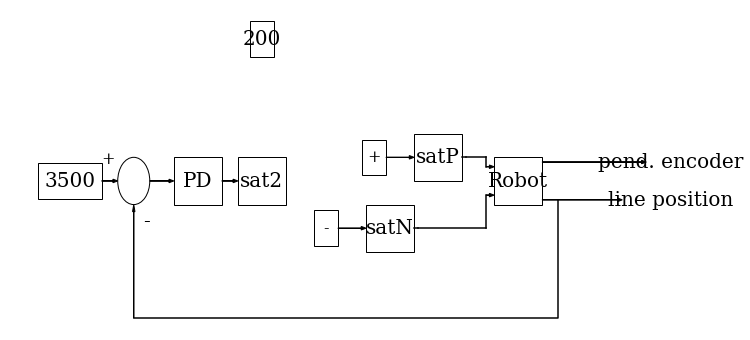

In [68]:
mysys = mydraw(block_list)

In [69]:
U2 = pybd.int_constant_block(0,"U_pend")

In [70]:
U2.place_relative(U,"above",15,xshift=-3)

In [71]:
block_list.append(U2)

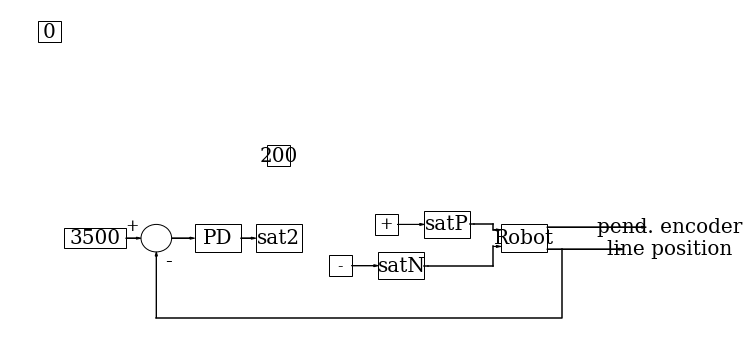

In [72]:
mysys = mydraw(block_list)

In [73]:
sum2 = pybd.summing_junction(variable_name='sum2')

In [74]:
sum2.place_relative(U2,"right")

In [75]:
block_list.append(sum2)

In [76]:
sum2.set_inputs(U2,G.sensor1)

In [77]:
D2 = pybd.PD_controller(3,0.1,variable_name='D_pend')

In [78]:
D2.set_input_block(sum2)

In [79]:
D2.place_relative(sum2,"right")

In [80]:
block_list.append(D2)

In [81]:
sat_pend = pybd.sat2_adjustable_block(200,variable_name='pend_sat')

In [82]:
sat_pend.set_input_block(D2)

In [83]:
sat_pend.place_relative(D2,"right")

In [84]:
block_list.append(sat_pend)

In [85]:
add_pend = pybd.addition_block(variable_name="add_pend")

In [86]:
add_pend.set_input1(sat_pend)

In [87]:
add_pend.set_input2(v_nom)

In [88]:
add_pend.place_relative(sat_pend,"right",yshift=-3)

In [89]:
block_list.append(add_pend)

In [90]:
add1.set_inputs(add_pend, sat)

In [91]:
subtract1.set_inputs(add_pend, sat)

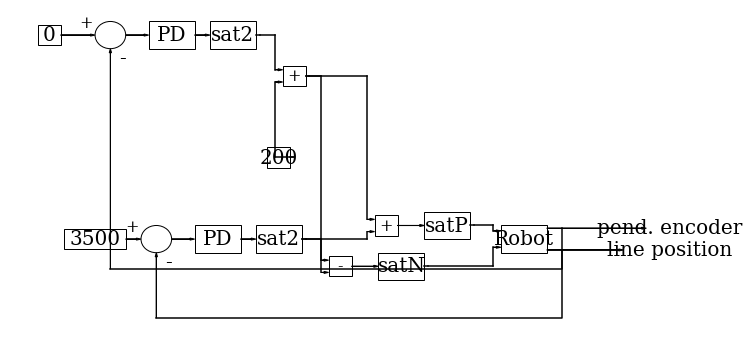

In [92]:
mydraw(block_list)

In [93]:
mysys.append_menu_param_from_block(D,"Kp")

In [94]:
mysys.append_menu_param_from_block(D,"Kd")

In [95]:
mysys.append_menu_param_from_block(v_nom,"value",1)

In [96]:
mysys.append_menu_param_global_variable("t_stop")

In [97]:
mysys.menu_param_list

[('PD_block.Kp', 0),
 ('PD_block.Kd', 0),
 ('v_nom_block.value', 1),
 ('t_stop', 0)]

## Print Blocks

In [98]:
mysys.print_blocks = [sum1,D,sat,satP,satN,pend_enc,line_sense]

## Execution Order

In [99]:
mysys.find_execution_order([U2,sum2,D2,sat_pend,U,sum1,D,sat,v_nom,add1,subtract1,add_pend])

In [100]:
mysys.execution_order

## Codegen Test

In [101]:
msg = "Cart Pendulum Line Follow 4"

In [102]:
mysys.welcome_msg = msg

In [103]:
ls *.ino

cart_pendulum_template1_vib_only.ino  cart_pendulum_template2.ino


In [104]:
template_fn = "cart_pendulum_template2.ino"

In [105]:
mysys.generate_arduino_code("cart_pendulum_autogen_4_line_follow_with_vib_suppress", template_fn,\
                           verbosity=1)

block: <py_block_diagram.int_constant_block object at 0x7b42bba4d668>
block: <py_block_diagram.summing_junction object at 0x7b42bba55be0>
block: <py_block_diagram.PD_controller object at 0x7b42bba4dd68>
block: <py_block_diagram.sat2_adjustable_block object at 0x7b42bba72748>
block: <py_block_diagram.int_constant_block object at 0x7b42b979d780>
block: <py_block_diagram.addition_block object at 0x7b42b99a3198>
block: <py_block_diagram.subtraction_block object at 0x7b42b979d1d0>
block: <py_block_diagram.sat2_adjustable_block object at 0x7b42b99660b8>
block: <py_block_diagram.sat2_adjustable_block object at 0x7b42b98eb898>
block: <py_block_diagram.plant_with_double_actuator_two_sensors object at 0x7b42bba725c0>
block: <py_block_diagram.output_block object at 0x7b42b96972e8>
block: <py_block_diagram.output_block object at 0x7b42b9700f60>
block: <py_block_diagram.int_constant_block object at 0x7b42b9627b70>
block: <py_block_diagram.summing_junction object at 0x7b42b956db00>
block: <py_block_

In [106]:
add1._get_arduino_param_str()

''